In [1]:
from flask import Flask
from flaskext.mysql import MySQL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
app= Flask(__name__)


In [2]:
def getConnect (server, port, database, username, password) :
    try:
        mysql = MySQL()
    # MySQL configurations
        app.config['MYSQL_DATABASE_HOST'] = server
        app.config['MYSQL_DATABASE_PORT'] = port
        app.config['MYSQL_DATABASE_DB'] = database
        app.config[ 'MYSQL_DATABASE_USER'] = username
        app.config['MYSQL_DATABASE_PASSWORD'] = password
        mysql.init_app(app)
        conn = mysql.connect()
        return conn
    except mysql.connector.Error as e:
        print("Error = ", e)
    return None
def closeConnection (conn):
    if conn!=None:
        conn.close ()

In [3]:
def queryDataset (conn, sql) :
    cursor = conn.cursor()
    cursor.execute(sql)

    df=pd. DataFrame(cursor.fetchall()) 
    return df

In [4]:
#slide 41
conn= getConnect('localhost',3306,'salesdatabase','root','110704')

sql1 = "select * from customer"
df1 = queryDataset(conn,sql1)
print(df1)

       0    1                2       3   4
0      1    1         lee Mean    Male  19
1      2    2       pinknguyen    Male  21
2      3    3           Lê Đảm  Female  20
3      4    4  Nguyễn Văn Toàn  Female  23
4      5    5         Trốc Gúi  Female  31
..   ...  ...              ...     ...  ..
195  196  196    Cytheria Tran  Female  35
196  197  197       truongbo37  Female  45
197  198  198       vohoan2408    Male  32
198  199  199        vinhdq.vn    Male  32
199  200  200          Nha6942    Male  30

[200 rows x 5 columns]


In [5]:
#42 

sql2 = "SELECT DISTINCT customer.CustomerId, Age, Annual_Income, Spending_Score" \
    " from customer, customer_spend_score "\
        "where customer.CustomerId = customer_spend_score.CustomerID"

df2 = queryDataset(conn, sql2)
df2.columns = [ 'CustomerId','Age', 'Annual Income', 'Spending Score']

print(df2)

print(df2.head())

print(df2.describe())


     CustomerId  Age  Annual Income  Spending Score
0             1   19             15              39
1             2   21             15              81
2             3   20             16               6
3             4   23             16              77
4             5   31             17              40
..          ...  ...            ...             ...
195         196   35            120              79
196         197   45            126              28
197         198   32            126              74
198         199   32            137              18
199         200   30            137              83

[200 rows x 4 columns]
   CustomerId  Age  Annual Income  Spending Score
0           1   19             15              39
1           2   21             15              81
2           3   20             16               6
3           4   23             16              77
4           5   31             17              40
       CustomerId         Age  Annual Income  Spendi

SLIDE 46: showHistogram()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8944\1145714511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=32)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8944\1145714511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=32)
C:\Users\ADMIN\AppData\Local\T

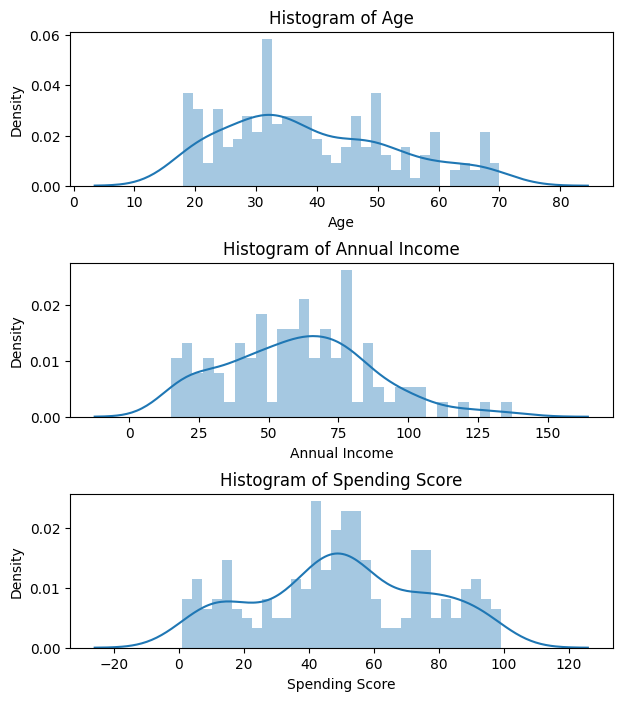

In [6]:

def showHistogram(df, columns):
    plt.figure(1, figsize=(7,8))
    n = 0
    for column in columns:
        n += 1
        plt.subplot(3, 1, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.distplot(df[column], bins=32)
        plt.title(f'Histogram of {column}')
    plt.show()

showHistogram(df2, df2.columns[1:])


Xác định số cụm k-Means --> Phương pháp Elbow 

In [7]:
def elbowMethod(df, columnsForElbow):


    X = df.loc[:, columnsForElbow].values

    inertia = []  
    
    for n in range(1, 11):
        model = KMeans(n_clusters=n, init='k-means++', max_iter=500, random_state=42)
        model.fit(X)
        inertia.append(model.inertia_)

    plt.figure(1, figsize=(15, 6))
    plt.plot(np.arange(1, 11), inertia, 'o')
    plt.plot(np.arange(1, 11), inertia, '-',alpha = 0.5)

    plt.xlabel('Số lượng cụm')
    plt.ylabel('Tổng bình phương khoảng cách cụm')
    plt.show()

 




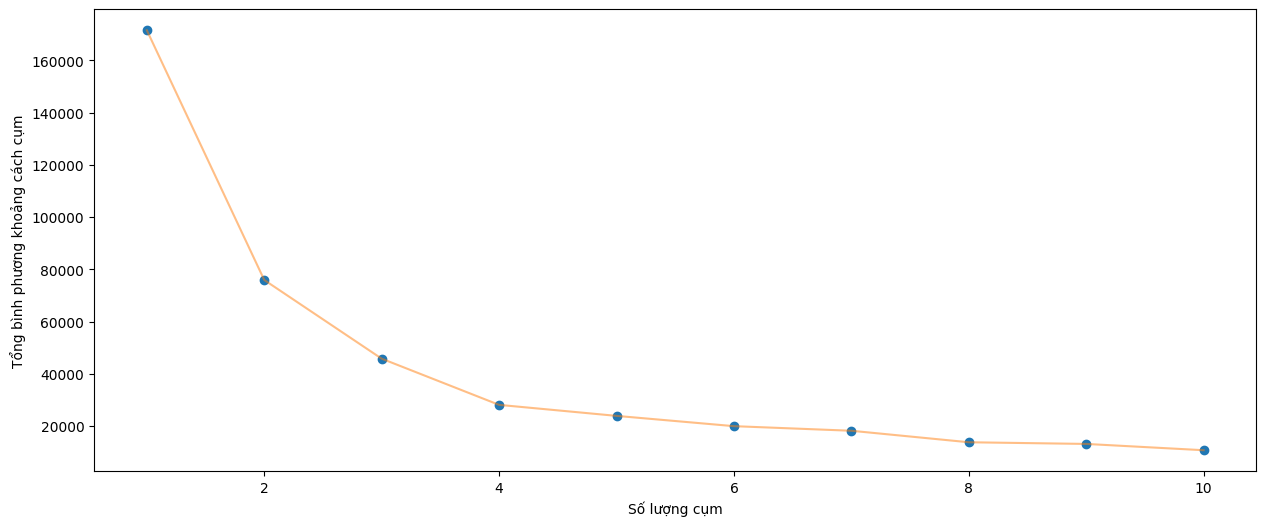

In [8]:
columns = ["Age", "Spending Score"]
elbowMethod(df2,columns)

Viết hàm runKMeans() với một đối số truyền vào là 1 ma trận X bất kỳ và số cluster muốn gom, cluster được lấy theo phương thức elbow


In [9]:
def runKMeans(X, cluster):

    model = KMeans(n_clusters=cluster, 
                   init='k-means++', max_iter=500, random_state=42)
    model.fit(X)

    labels = model.labels_
    centroids = model.cluster_centers_
    y_kmeans = model.fit_predict(X)

    return y_kmeans, centroids,  labels

Thử nghiệm triệu gọi hàm runKMeans(), với columns[Age, Spending Score], cluster=4
Mảng X được lấy theo các columns (các thuộc tính mà customer ta muốn clustering)
Chạy và quan sát kết quả dòng 103, 104, 105
Đồng thời tạo cột cluster cho df2, nhằm phục vụ cho truy vấn danh sách Customer chi tiết theo từng cụm


In [10]:
X = df2.loc[:, columns].values
cluster = 4
colors = ["red", "green", "blue", "purple", "black", "pink","orange"]

y_kmeans, centroids, labels = runKMeans(X, cluster)

print (y_kmeans)
print(centroids)
print(labels)

df2 ["cluster"] = labels


[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]
[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [11]:
df2.loc[103:105, :]

,CustomerId,Age,Annual Income,Spending Score,cluster
103,104,26,62,55,3
104,105,49,62,56,0
105,106,21,62,42,3


Viết hàm visualizeKMeans nhận vào 6 đối số, hàm này trực quan hóa kết quả gom cụm
X: ma trận đã gom cụm
y_kmeans: nhãn các phần tử được gom cụm
cluster: số cụm
title: tiêu đề
xlabel: nhãn trục x
ylabel: nhãn trục y
colors: mảng màu


In [12]:
def visualizeKMeans(X, y_kmeans, cluster, title, xlabel, ylabel, colors):

    plt.figure(figsize=(10, 10))

    for i in range(cluster):
        plt.scatter(
            X[y_kmeans == i, 0],
            X[y_kmeans == i, 1],
            s=100,
            c=colors[i],
            label="Cluster %i" % (i + 1),
        )

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


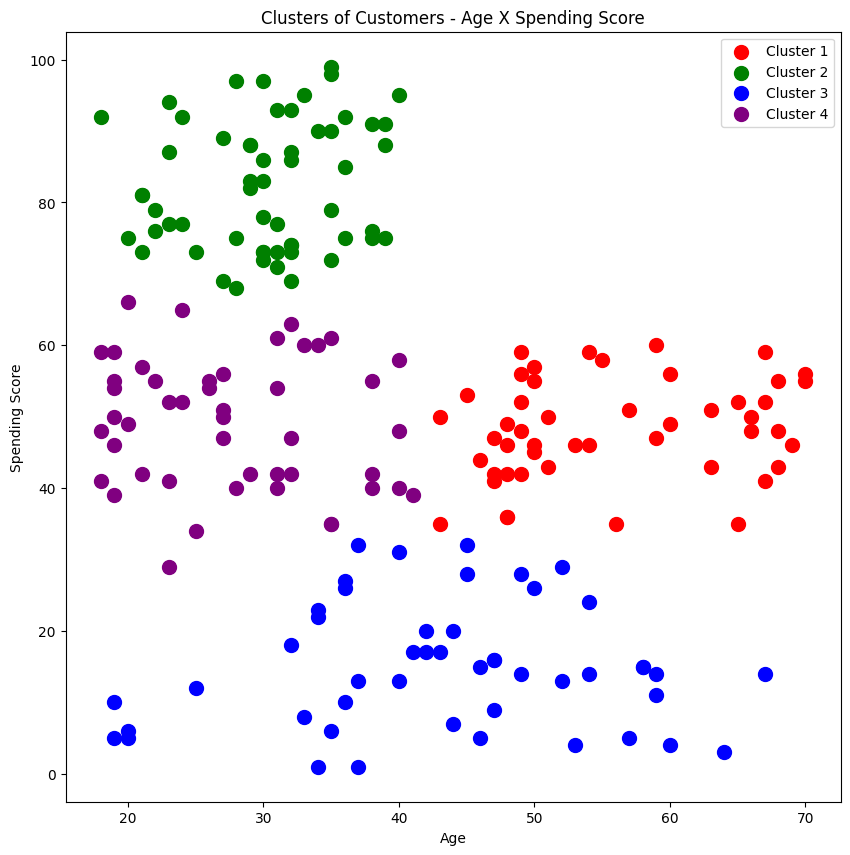

In [13]:
visualizeKMeans(X, y_kmeans, cluster,
                "Clusters of Customers - Age X Spending Score",
                "Age",
                "Spending Score", colors)

Thực nghiệm gom cụm theo 2 cột khác: Cột Annual Income và Spending Score
SLIDE 56


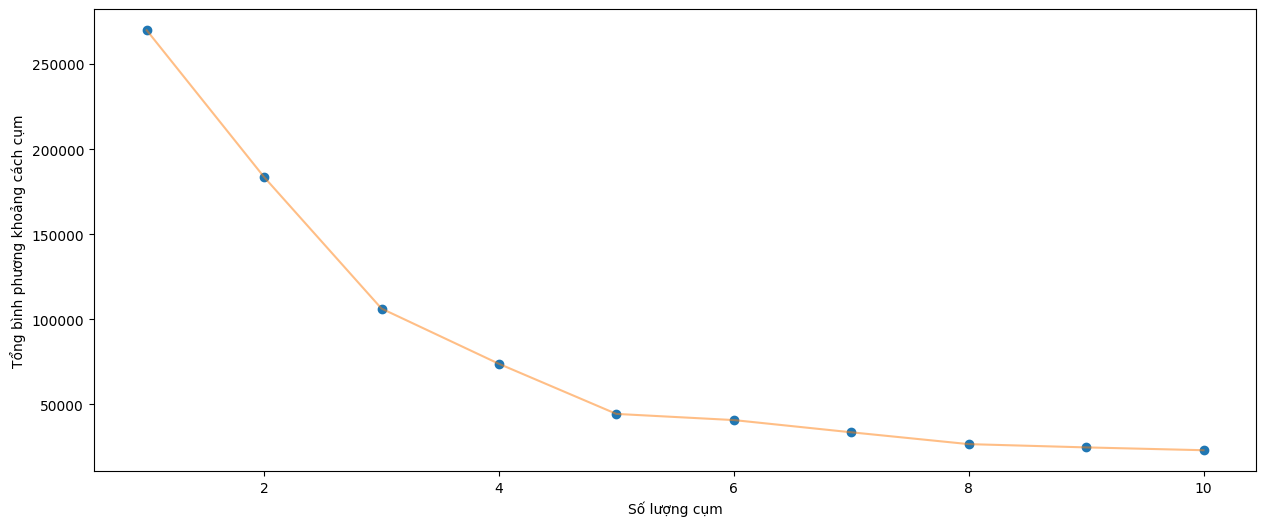

In [14]:
columns = ["Annual Income", "Spending Score"]
elbowMethod(df2,columns)

In [15]:
X = df2.loc[:, columns].values
cluster = 5

y_kmeans, centroids, labels = runKMeans(X, cluster)

print (y_kmeans)
print(centroids)
print(labels)

df2 ["cluster"] = labels


[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


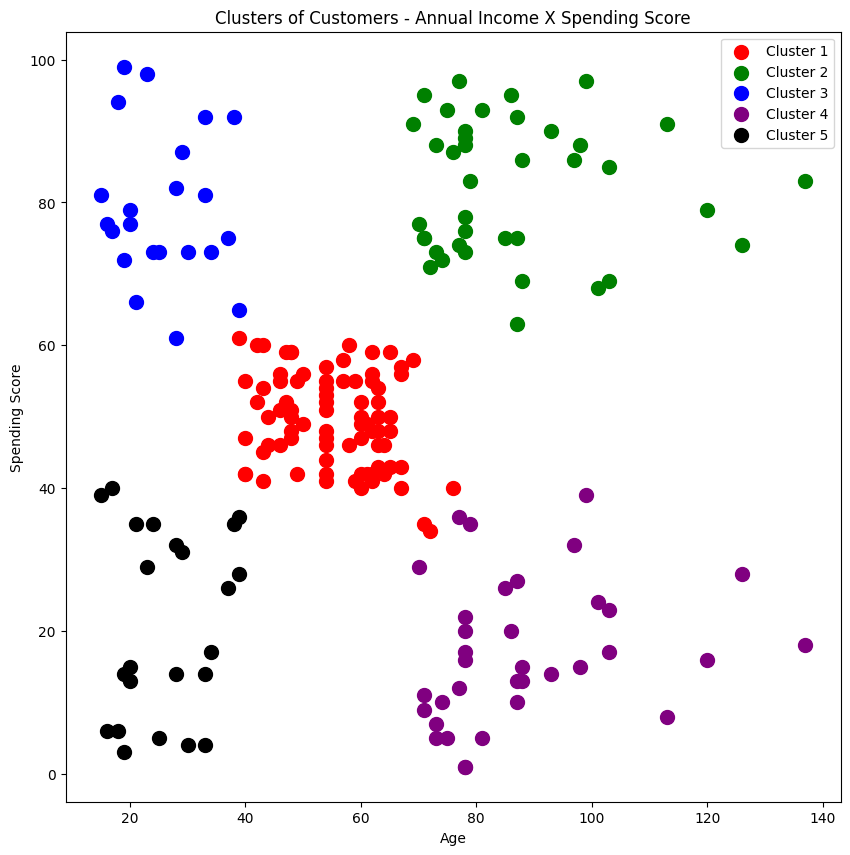

In [16]:
visualizeKMeans(X, y_kmeans, cluster,
                "Clusters of Customers - Annual Income X Spending Score",
                "Age",
                "Spending Score", colors)

Thực nghiệm gom cụm theo 3 cột khác: Cột Age, Annual Income và Spending Score


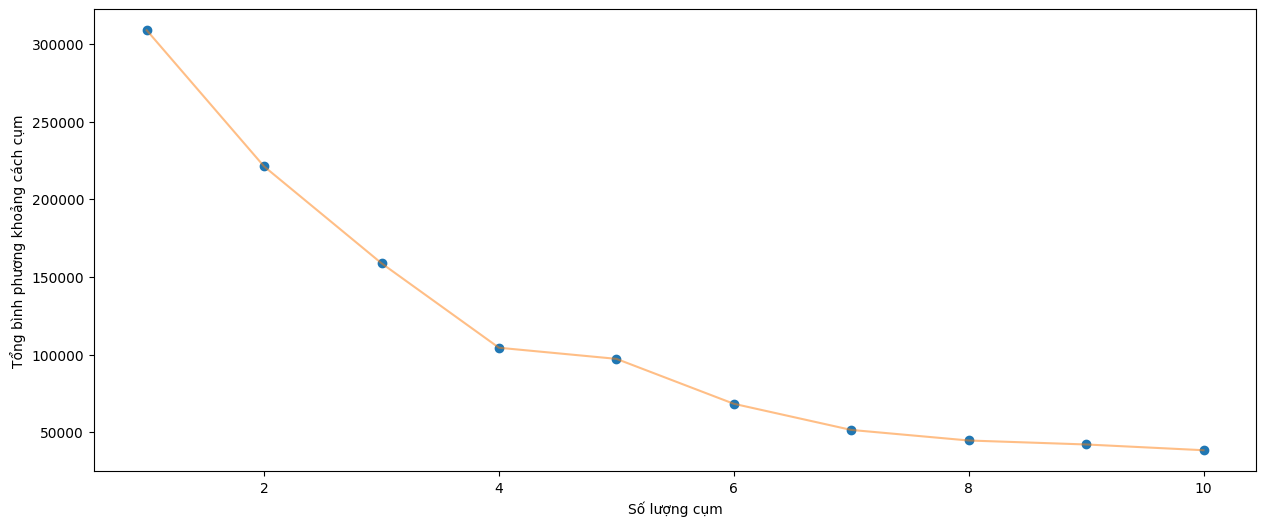

In [17]:
columns = ["Age","Annual Income", "Spending Score",]
elbowMethod(df2,columns)

In [18]:
X = df2.loc[:, columns].values
cluster = 6

y_kmeans, centroids, labels = runKMeans(X, cluster)

print (y_kmeans)
print(centroids)
print(labels)

df2 ["cluster"] = labels
df2


[5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 5 2 5 2 5 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 3 4 0 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
[[ 43.93421053  55.21052632  49.44736842]
 [ 32.2        109.7         82.        ]
 [ 24.96        28.04        77.        ]
 [ 40.32432432  87.43243243  18.18918919]
 [ 32.86206897  78.55172414  82.17241379]
 [ 45.2173913   26.30434783  20.91304348]]
[5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 5 2 5 2 5 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 3 4 0 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4

,CustomerId,Age,Annual Income,Spending Score,cluster
0,1,19,15,39,5
1,2,21,15,81,2
2,3,20,16,6,5
3,4,23,16,77,2
4,5,31,17,40,5
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,3
197,198,32,126,74,1
198,199,32,137,18,3


Vì trường hợp này dạng 3 thuộc tính (cột) nên ta bổ sung thêm 1 hàm trực quan hóa 3D kết quả gom cụm:
df: tập dữ liệu đã gom cụm.
columns: dữ liệu các trục. Là dữ liệu có các cột mà ta gom cụm
hover_data: Khi di chuyển chuột vào node sẽ hiển thị chi tiết.
cluser: số cụm



In [19]:
def visualize3DKmeans(df, columns, hover_data, cluster):

    fig = px.scatter_3d(df,
                        x=columns[0],
                        y=columns[1],
                        z=columns[2],
                        color='cluster',
                        hover_data=hover_data,
                        category_orders={"cluster": range(0, cluster)},
                        )

    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

    fig.show()


In [20]:
import plotly.express as px

hover_data = df2.columns
visualize3DKmeans(df2, columns, hover_data, cluster)

In [21]:
df2 

,CustomerId,Age,Annual Income,Spending Score,cluster
0,1,19,15,39,5
1,2,21,15,81,2
2,3,20,16,6,5
3,4,23,16,77,2
4,5,31,17,40,5
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,3
197,198,32,126,74,1
198,199,32,137,18,3


BÀI TẬP 1 SLIDE 67

In [22]:
def print_cluster_details_to_console(df):

    for cluster_id in range(6):  # Lặp qua các cluster từ 0 đến 5
        cluster_data = df[df['cluster'] == cluster_id]  # Lọc dữ liệu cho cụm hiện tại
        
        print(f"Cluster {cluster_id}:")
        print(cluster_data[['CustomerId', 'Age', 'Annual Income', 'Spending Score']])
        print("\n")

# Sử dụng hàm với dataframe đã cho
print_cluster_details_to_console(df2)


Cluster 0:
     CustomerId  Age  Annual Income  Spending Score
46           47   50             40              55
47           48   27             40              47
48           49   29             40              42
49           50   31             40              42
50           51   49             42              52
..          ...  ...            ...             ...
119         120   50             67              57
120         121   27             67              56
121         122   38             67              40
122         123   40             69              58
126         127   43             71              35

[76 rows x 4 columns]


Cluster 1:
     CustomerId  Age  Annual Income  Spending Score
181         182   32             97              86
183         184   29             98              88
185         186   30             99              97
187         188   28            101              68
189         190   36            103              85
191         192  

In [23]:
cluster0 = df2[df2['cluster'] == 0] 
cluster0

,CustomerId,Age,Annual Income,Spending Score,cluster
46,47,50,40,55,0
47,48,27,40,47,0
48,49,29,40,42,0
49,50,31,40,42,0
50,51,49,42,52,0
...,...,...,...,...,...
119,120,50,67,57,0
120,121,27,67,56,0
121,122,38,67,40,0
122,123,40,69,58,0


In [24]:
cluster1 = df2[df2['cluster'] == 1] 
cluster1

,CustomerId,Age,Annual Income,Spending Score,cluster
181,182,32,97,86,1
183,184,29,98,88,1
185,186,30,99,97,1
187,188,28,101,68,1
189,190,36,103,85,1
191,192,32,103,69,1
193,194,38,113,91,1
195,196,35,120,79,1
197,198,32,126,74,1
199,200,30,137,83,1


In [25]:
cluster2 = df2[df2['cluster'] == 2] 
cluster2

,CustomerId,Age,Annual Income,Spending Score,cluster
1,2,21,15,81,2
3,4,23,16,77,2
5,6,22,17,76,2
7,8,23,18,94,2
9,10,30,19,72,2
11,12,35,19,99,2
13,14,24,20,77,2
15,16,22,20,79,2
17,18,20,21,66,2
19,20,35,23,98,2


In [26]:
cluster3 = df2[df2['cluster'] == 3] 
cluster3

,CustomerId,Age,Annual Income,Spending Score,cluster
124,125,23,70,29,3
128,129,59,71,11,3
130,131,47,71,9,3
132,133,25,72,34,3
134,135,20,73,5,3
136,137,44,73,7,3
138,139,19,74,10,3
140,141,57,75,5,3
142,143,28,76,40,3
144,145,25,77,12,3


In [27]:
cluster4 = df2[df2['cluster'] == 4] 
cluster4

,CustomerId,Age,Annual Income,Spending Score,cluster
123,124,39,69,91,4
125,126,31,70,77,4
127,128,40,71,95,4
129,130,38,71,75,4
131,132,39,71,75,4
133,134,31,72,71,4
135,136,29,73,88,4
137,138,32,73,73,4
139,140,35,74,72,4
141,142,32,75,93,4


In [28]:
cluster5 = df2[df2['cluster'] == 5] 
cluster5

,CustomerId,Age,Annual Income,Spending Score,cluster
0,1,19,15,39,5
2,3,20,16,6,5
4,5,31,17,40,5
6,7,35,18,6,5
8,9,64,19,3,5
10,11,67,19,14,5
12,13,58,20,15,5
14,15,37,20,13,5
16,17,35,21,35,5
18,19,52,23,29,5


In [29]:
df2

,CustomerId,Age,Annual Income,Spending Score,cluster
0,1,19,15,39,5
1,2,21,15,81,2
2,3,20,16,6,5
3,4,23,16,77,2
4,5,31,17,40,5
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,3
197,198,32,126,74,1
198,199,32,137,18,3
